In [1]:
# Martha Dunne
# C:\Users\mabdu\Practicum1a.ipynb
# anaconda Navigator
# jupyter notebook
# python 3.8
# pandas 0.25.1
# numpy 1.16.5
# matplotlib 3.1.1
# seaborn 0.9.0
#
# Using the merged file from Practicum_Clean_Merge.ipynb
# Saved here as PracticumMergedData20200817.csv for project delivery. 
# Can be rerun for current dates and information.

##### Practicum_Model.ipynb
#####   Step 3 Modeling
#####   Regression Analysis 
#####   of Step 1 file of clean, merged covid and mobility data
#####   analyzed in Step 2
#####
#####
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
# from datetime import datetime, timedelta
from scipy import stats
from datetime import datetime, timedelta
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# refer back to this
#https://realpython.com/linear-regression-in-python/#simple-linear-regression
#Simple, Multiple Linear, Polynomial 

## Read merged and cleaned file of two datasets
###     1 - Covid-19 John Hopkins dataset
###     2 - Google mobility data
### Merged data starts 2020-02-20, current day delayed several days due to mobility data processing

In [2]:
# Using the merged file from Practicum_Clean_Merge.ipynb
# Merge of two datasets
#  1- John hopkins dataset which updates daily
#  2- google cellphone mobility data which updates daily but is 3 to 4 days delayed due to processing
# dropping columns after Analysis phase to focus on columns: cases, retailrec, groceryrx, transit, work
# parks data has positive and negative correlations depending on the country
# reside had a moderate to weak positive correlation depending on the country
dfmrg = pd.read_csv("PracticumMergedData20200817.csv", parse_dates = [1])
#dfmrg = pd.read_csv("PracticumMergedData.csv", parse_dates = [1])
#dfmrg = dfmrg.drop(columns = ['cases','casesdelta14','deaths','deathsdelta','deathsdelta14','parks','reside'])
dfmrg = dfmrg.drop(columns = ['cases','casesdelta14','deaths','deathsdelta','deathsdelta14','parks'])

In [5]:
dfmrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22797 entries, 0 to 22796
Data columns (total 8 columns):
country_region    22797 non-null object
date              22797 non-null datetime64[ns]
casesdelta        22797 non-null float64
retailrec         22542 non-null float64
grocerrx          22498 non-null float64
transit           22609 non-null float64
work              22745 non-null float64
reside            22325 non-null float64
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.3+ MB


In [6]:
dfnz = dfmrg[dfmrg.country_region.str.contains('New Zealand',case=True)]
dfsi = dfmrg[dfmrg.country_region.str.contains('Singapore',case=True)]
dfca = dfmrg[dfmrg.country_region.str.contains('Canada',case=True)]

In [14]:
#final project deliverable PracticumMergedData20200817
# max date in file is 2020-08-13
# date for validation purposes is  2020-08-13
from datetime import datetime, timedelta
# CHANGEME IF RUNNING FROM STATIC FILE PracticumMergedData20200817.csv
validation_date = datetime.strftime(datetime.now() - timedelta(10), '%Y-%m-%d')
print('Save date for validation purposes is ', validation_date)

Save date for validation purposes is  2020-08-13


In [15]:
dfmrg[( (dfmrg.country_region.str.contains('New Zealand',case=True))
      |(dfmrg.country_region.str.contains('Singapore',case=True))
      |(dfmrg.country_region.str.contains('Canada',case=True))
      )
      & (dfmrg['date'] > validation_date)].sort_values(by='casesdelta',ascending=True)

,country_region,date,casesdelta,retailrec,grocerrx,transit,work,reside
14287,New Zealand,2020-08-14,7.0,-25.0,-7.0,-53.0,-20.0,14.0
18246,Singapore,2020-08-14,83.0,-23.0,-6.0,-32.0,-27.0,22.0
3958,Canada,2020-08-14,425.0,-14.0,1.0,-42.0,-40.0,9.0


In [16]:
###############monkeywrench
# eliminate some outliers, 0 was giving divide by zero errors during modeling with the available data
#dfnz = dfnz[dfnz['cases'] > 0]
#dfnz

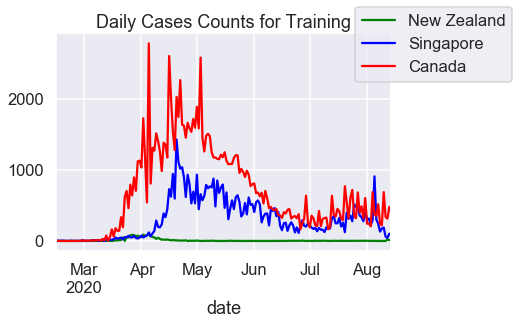

In [17]:
ax = plt.gca()
plt.title('Daily Cases Counts for Training')
dfnz.plot(kind='line',x='date',y='casesdelta',label='New Zealand',color='green',ax=ax)
dfsi.plot(kind='line',x='date',y='casesdelta',label='Singapore',color='blue',ax=ax)
dfca.plot(kind='line',x='date',y='casesdelta',label='Canada',color='red',ax=ax)
plt.legend(bbox_to_anchor=(1.2, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

In [18]:
###############monkeywrench
# side investigation to remove 0, was giving divide by zero errors during modeling
#dfnz = dfnz[dfnz['casesdelta14'] > 0]
#dfnz
dfnz0 =  dfnz[dfnz['casesdelta'] > 0]
dfsi0 =  dfsi[dfsi['casesdelta'] > 0]
dfca0 =  dfca[dfca['casesdelta'] > 0]

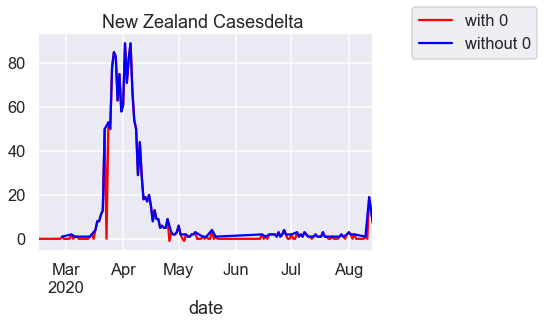

In [19]:
ax = plt.gca()
plt.title('New Zealand Casesdelta ')
#dfmrg[dfmrg.country_region.str.contains('New Zealand',case=True)].plot(kind='line',x='date',y='casesdelta14',color='red',ax=ax)
dfnz.plot(kind='line',x='date',y='casesdelta',color='red',label='with 0',ax=ax)
dfnz0.plot(kind='line',x='date',y='casesdelta',color='blue',label='without 0',ax=ax)
plt.legend(bbox_to_anchor=(1.3, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

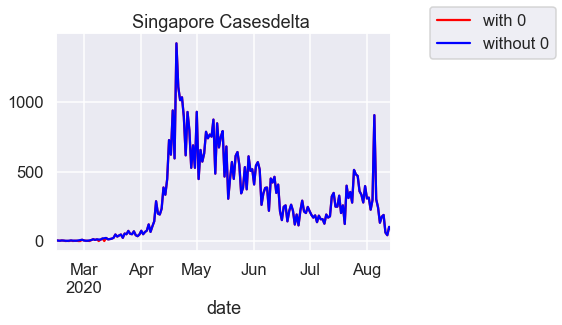

In [20]:
ax = plt.gca()
plt.title('Singapore Casesdelta ')
#dfmrg[dfmrg.country_region.str.contains('New Zealand',case=True)].plot(kind='line',x='date',y='casesdelta14',color='red',ax=ax)
dfsi.plot(kind='line',x='date',y='casesdelta',color='red',label='with 0',ax=ax)
dfsi0.plot(kind='line',x='date',y='casesdelta',color='blue',label='without 0',ax=ax)
plt.legend(bbox_to_anchor=(1.3, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

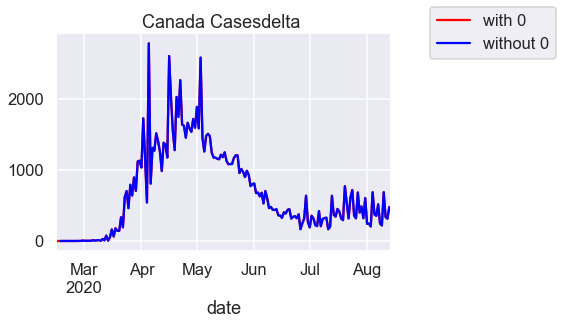

In [21]:
ax = plt.gca()
plt.title('Canada Casesdelta ')
#dfmrg[dfmrg.country_region.str.contains('New Zealand',case=True)].plot(kind='line',x='date',y='casesdelta14',color='red',ax=ax)
dfca.plot(kind='line',x='date',y='casesdelta',color='red',label='with 0',ax=ax)
dfca0.plot(kind='line',x='date',y='casesdelta',color='blue',label='without 0',ax=ax)
plt.legend(bbox_to_anchor=(1.3, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

In [22]:
#dfnz0.corr()
#dfsi0.corr()
#dfca0.corr()

## Seaborn pairplot histogram and scatterplots

New Zealand


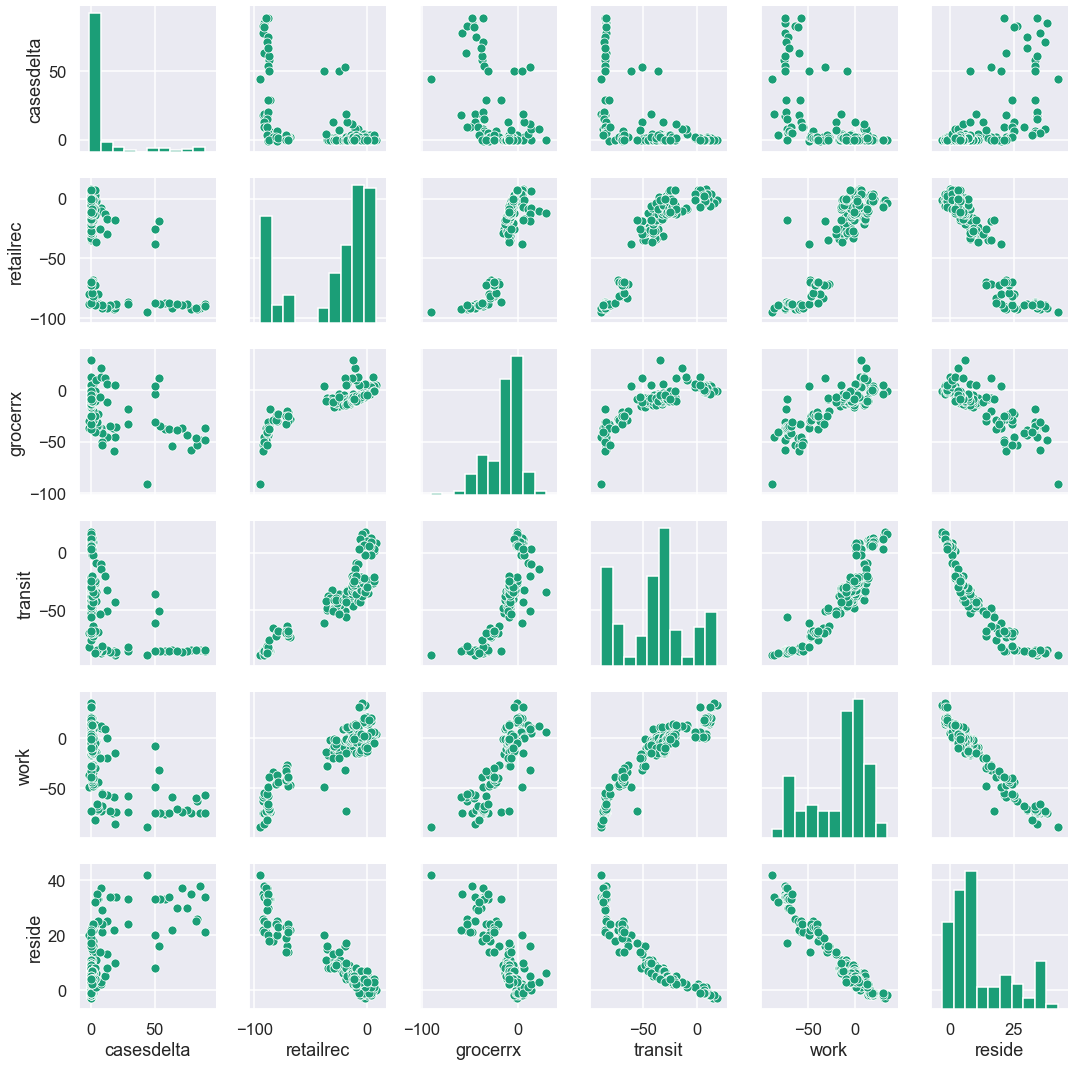

In [23]:
print('New Zealand')
sns.pairplot(dfnz)

Singapore


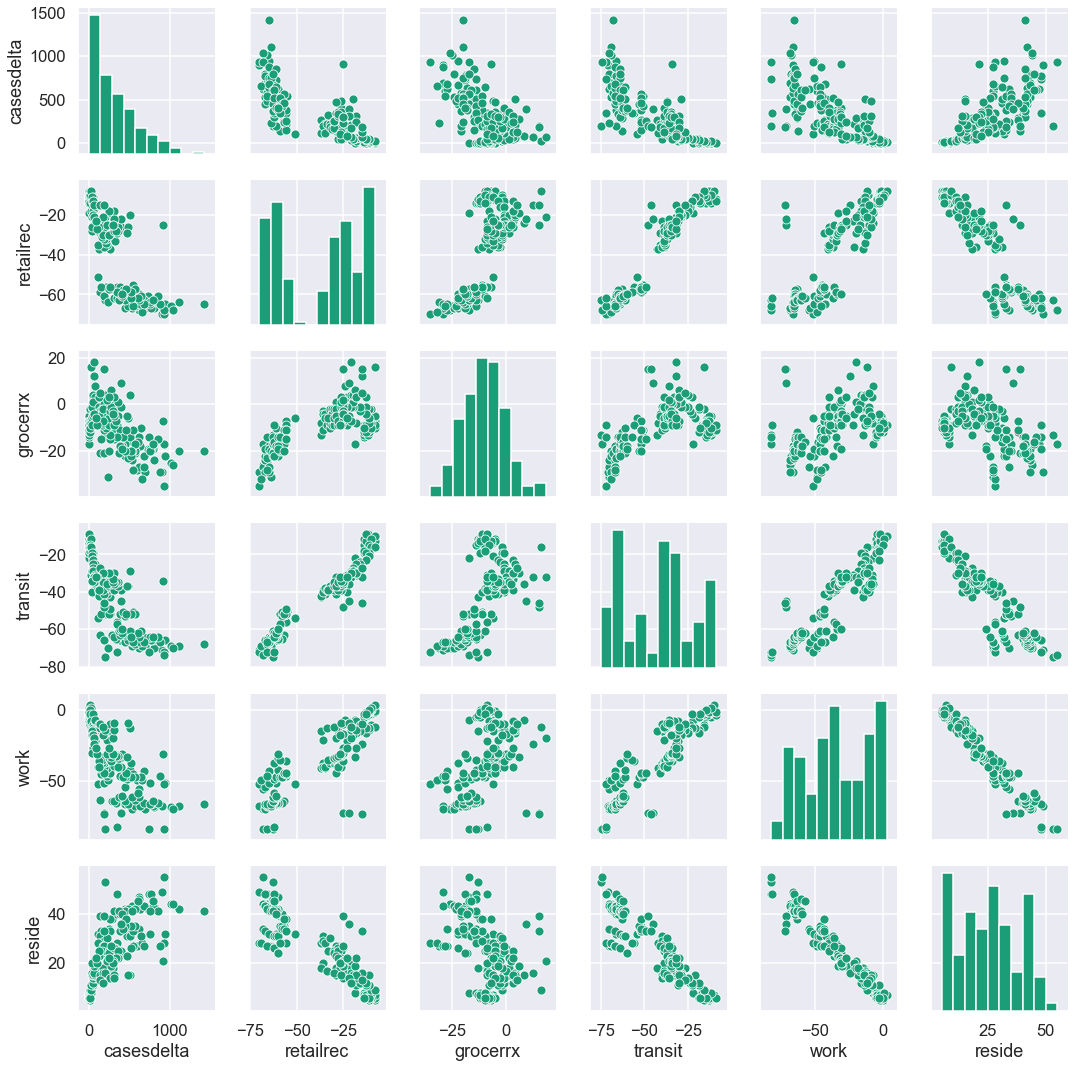

In [24]:
print('Singapore')
sns.pairplot(dfsi)

Canada


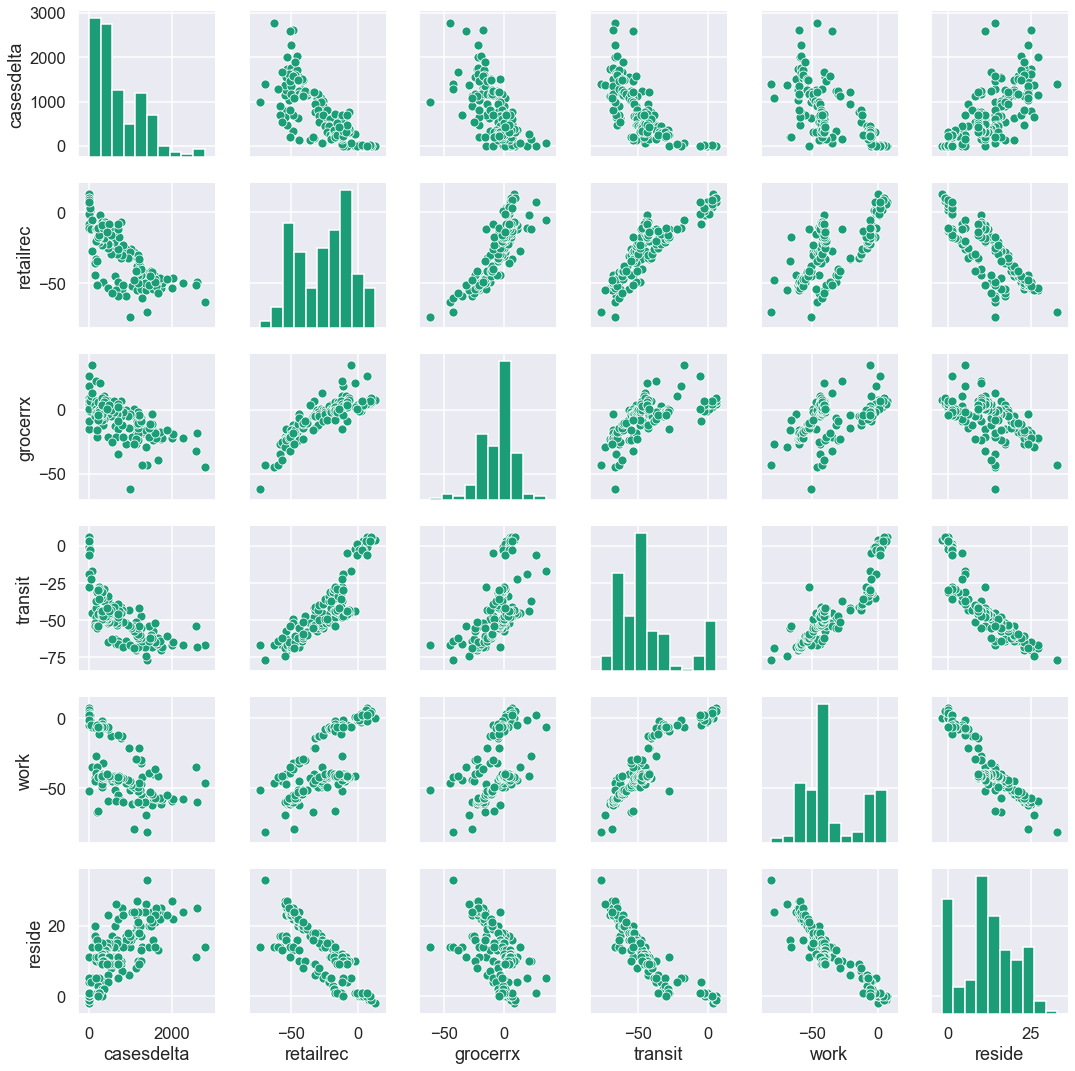

In [25]:
print('Canada')
sns.pairplot(dfca)

### Heatmaps

In [26]:
htnz=dfnz.drop(columns = ['country_region','date'])
htsi=dfsi.drop(columns = ['country_region','date'])
htca=dfca.drop(columns = ['country_region','date'])

New Zealand Heatmap


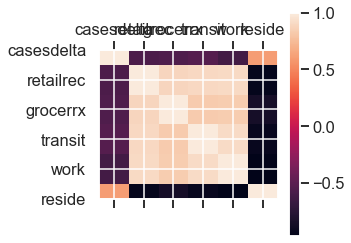

In [27]:
#https://benalexkeen.com/correlation-in-python/
print('New Zealand Heatmap')
plt.matshow(htnz.corr())
plt.xticks(range(len(htnz.columns)), htnz.columns)
plt.yticks(range(len(htnz.columns)), htnz.columns)
plt.colorbar()
plt.show()

Singapore Heatmap


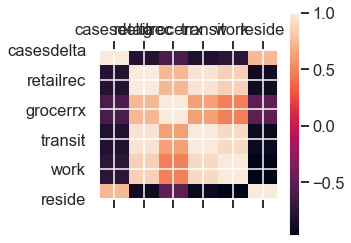

In [28]:
print('Singapore Heatmap')
plt.matshow(htsi.corr())
plt.xticks(range(len(htsi.columns)), htsi.columns)
plt.yticks(range(len(htsi.columns)), htsi.columns)
plt.colorbar()
plt.show()

Canada Heatmap


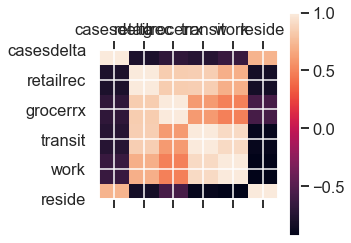

In [29]:
print('Canada Heatmap')
plt.matshow(htca.corr())
plt.xticks(range(len(htca.columns)), htca.columns)
plt.yticks(range(len(htca.columns)), htca.columns)
plt.colorbar()
plt.show()

## Distribution skewness curtosis

In [30]:
# regression model performs better for normally distributed data
# skewness > +1, substantially skewed to the right
# kurtosis > +1, the distribution is too peaked
#casesdelta 
print("NZ Skewness = ", dfnz['casesdelta'].skew())
print("NZ Kurtosis = ", dfnz['casesdelta'].kurtosis())
print("SI Skewness = ", dfsi['casesdelta'].skew())
print("SI Kurtosis = ", dfsi['casesdelta'].kurtosis())
print("CA Skewness = ", dfca['casesdelta'].skew())
print("CA Kurtosis = ", dfca['casesdelta'].kurtosis())

NZ Skewness =  2.7277093749925165
NZ Kurtosis =  6.400003898979181
SI Skewness =  1.0719894512257258
SI Kurtosis =  0.9086860716304752
CA Skewness =  1.008871156124238
CA Kurtosis =  0.7124617760906453


## Plot distribution and QQ Plot

In [31]:
# https://www.kaggle.com/nickelkumawat/linear-regression-house-prices, explore what we have to predict
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
train2 = dfsi
train3 = dfnz


 mu = 305.02 and sigma = 281.20



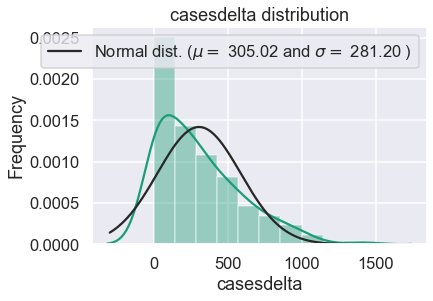

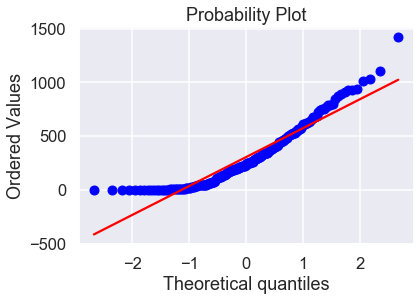

In [32]:
sns.distplot(train2['casesdelta'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train2['casesdelta'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('casesdelta distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train2['casesdelta'], plot=plt)
plt.show()
#The data is right skewed. Regression model performs better for normally distributed data.


 mu = 8.84 and sigma = 20.31



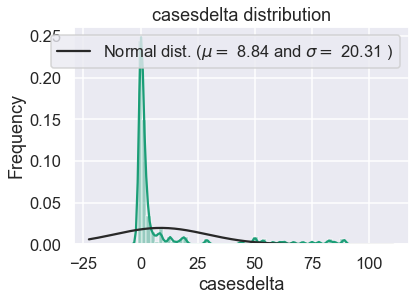

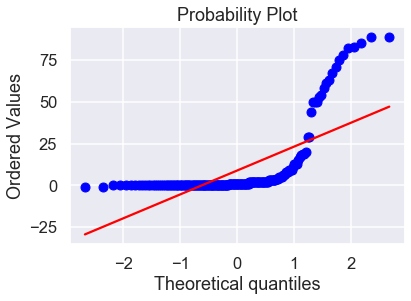

In [33]:
sns.distplot(train3['casesdelta'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train3['casesdelta'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('casesdelta distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train3['casesdelta'], plot=plt)
plt.show()
#The data is right skewed. Regression model performs better for normally distributed data.

# Linear Regression in Python with Pandas & Scikit-Learn

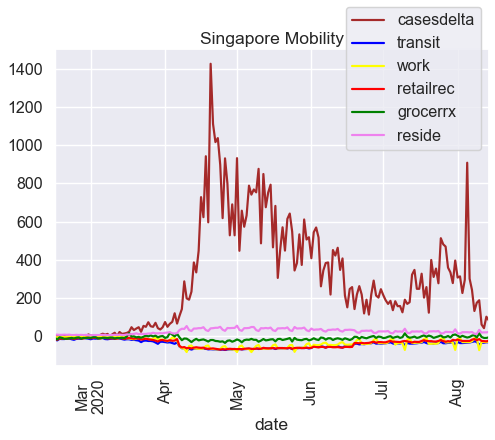

In [34]:
plt.figure(figsize=(8, 6), dpi=70)
ax = plt.gca()
plt.title('Singapore Mobility')
dfsi.plot(kind='line',x='date',y='casesdelta',color='brown',ax=ax)
dfsi.plot(kind='line',x='date',y='transit',color='blue',ax=ax)
dfsi.plot(kind='line',x='date',y='work', color='yellow', ax=ax)
dfsi.plot(kind='line',x='date',y='retailrec', color='red', ax=ax)
dfsi.plot(kind='line',x='date',y='grocerrx', color='green', ax=ax)
dfsi.plot(kind='line',x='date',y='reside', color='violet', ax=ax)
plt.legend(bbox_to_anchor=(0.9, 1), bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

## Linear Regression #1, use  k-folds cross-validation (k=3) to assess the performance of our model.

### Singapore

In [35]:
# define function to run Linear Regression
#use k-folds cross-validation (k=3) to assess the performance of our model.
#create arrays (the instances of the class numpy.ndarray) 
#   x, inputs (regressors, 𝑥) : mobility data
#   y, output (predictor, 𝑦) : casesdelta
# previous cleanup handled na NaN

#model = LinearRegression() creates a linear regression model and 
#the for loop divides the dataset into three folds (by shuffling its indices). 
#Inside the loop, we fit the data and then assess its performance by appending 
#its score to a list (scikit-learn returns the R² score which is simply the coefficient of determination).
def kfoldXVal(Xdf, ydf):
    model = LinearRegression()
    scores = []
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    for i, (train, test) in enumerate(kfold.split(Xdf, ydf)):
     model.fit(Xdf.iloc[train,:], ydf.iloc[train,:])
     score = model.score(Xdf.iloc[test,:], ydf.iloc[test,:])
     scores.append(score)
    print(scores)
    #  obtain the coefficient of determination (𝑅²)
    r_sq = model.score(Xdf.iloc[test,:], ydf.iloc[test,:])
    print('coefficient of determination:', r_sq)
    #get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
    print('intercept:', model.intercept_)

In [36]:
Xdf = pd.DataFrame(dfsi['retailrec'])
ydf = pd.DataFrame(dfsi['casesdelta'])
print('Singapore retailrec')
kfoldXVal(Xdf, ydf)

Singapore retailrec
[0.4987521884336874, 0.7410778684858409, 0.6683489981467163]
coefficient of determination: 0.6683489981467163
intercept: [-92.46516179]


In [37]:
Xdf = pd.DataFrame(dfsi['transit'])
ydf = pd.DataFrame(dfsi['casesdelta'])
print('Singapore transit')
kfoldXVal(Xdf, ydf)

Singapore transit
[0.5138677132209684, 0.7290244653326992, 0.6872686499311905]
coefficient of determination: 0.6872686499311905
intercept: [-184.29554491]


In [38]:
Xdf = pd.DataFrame(dfsi['work'])
ydf = pd.DataFrame(dfsi['casesdelta'])
print('Singapore work')
kfoldXVal(Xdf, ydf)

Singapore work
[0.44791913358130114, 0.5789678960608649, 0.598229985738225]
coefficient of determination: 0.598229985738225
intercept: [0.0275629]


In [39]:
Xdf = pd.DataFrame(dfsi['reside'])
ydf = pd.DataFrame(dfsi['casesdelta'])
print('Singapore reside')
kfoldXVal(Xdf, ydf)

Singapore reside
[0.46524808256606043, 0.631974777697348, 0.5852586702277534]
coefficient of determination: 0.5852586702277534
intercept: [-96.99773542]


### Canada

In [ ]:
#Xdf = pd.DataFrame(dfca['retailrec'])
#ydf = pd.DataFrame(dfca['casesdelta'])
#print('Canada retailrec')
#kfoldXVal(Xdf, ydf)

In [ ]:
#interpret the r2 score
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


## LinearRegression Visualization Singapore r^2

In [40]:
# Regression plot
def plot(x, y , predicted):
    plt.scatter(x, y, color='black')
    plt.plot(x, predicted,'-r')
    plt.xlabel('X')
    plt.ylabel('y (casesdelta)')
    plt.show()

In [41]:
### MAD borrowed from below
model = LinearRegression()

LINEARREGRESSION MODEL of SINGAPORE retailrec vs casesdelta
coefficient of determination: 0.6225541234507563
intercept: -86.18855148132593


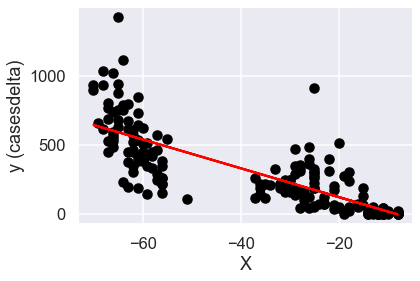

In [42]:
#model = LinearRegression()
## these are numpy arrays
X = dfsi['retailrec'].to_numpy()
y = dfsi['casesdelta'].to_numpy()

x_full = X.reshape(-1,1)
y_full = y
# Fit with full data
model.fit(x_full, y_full)
predicted_full = model.predict(x_full)
print('LINEARREGRESSION MODEL of SINGAPORE retailrec vs casesdelta')
#  obtain the coefficient of determination (𝑅²) the square of the correlation between x and y scores.
r_sq = model.score(x_full, y_full)
print('coefficient of determination:', r_sq)
#get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
print('intercept:', model.intercept_)
plot(x_full, y_full, predicted_full)

LINEARREGRESSION MODEL of SINGAPORE transit vs casesdelta
coefficient of determination: 0.6362741549141362
intercept: -185.51893451871427


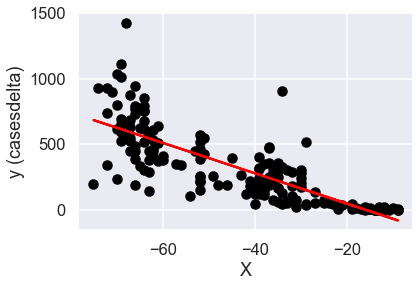

In [43]:
## these are numpy arrays
X = dfsi['transit'].to_numpy()
y = dfsi['casesdelta'].to_numpy()

x_full = X.reshape(-1,1)
y_full = y
# Fit with full data
model.fit(x_full, y_full)
predicted_full = model.predict(x_full)
print('LINEARREGRESSION MODEL of SINGAPORE transit vs casesdelta')
#  obtain the coefficient of determination (𝑅²) the square of the correlation between x and y scores.
r_sq = model.score(x_full, y_full)
print('coefficient of determination:', r_sq)
#get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
print('intercept:', model.intercept_)
plot(x_full, y_full, predicted_full)

LINEARREGRESSION MODEL of SINGAPORE work vs casesdelta
coefficient of determination: 0.5425330843988656
intercept: -0.6205945185008659


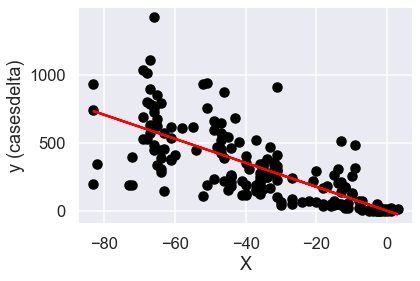

In [48]:
#model = LinearRegression()
## these are numpy arrays
X = dfsi['work'].to_numpy()
y = dfsi['casesdelta'].to_numpy()

x_full = X.reshape(-1,1)
y_full = y
# Fit with full data
model.fit(x_full, y_full)
predicted_full = model.predict(x_full)
print('LINEARREGRESSION MODEL of SINGAPORE work vs casesdelta')
#  obtain the coefficient of determination (𝑅²) the square of the correlation between x and y scores.
r_sq = model.score(x_full, y_full)
print('coefficient of determination:', r_sq)
#get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
print('intercept:', model.intercept_)
plot(x_full, y_full, predicted_full)

LINEARREGRESSION MODEL of SINGAPORE reside vs casesdelta
coefficient of determination: 0.5539708603472324
intercept: -98.19185091762313


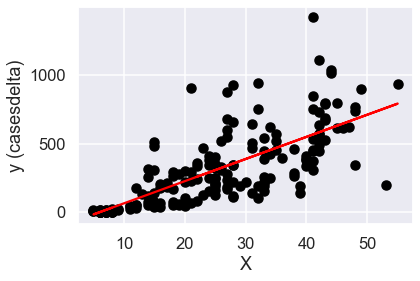

In [49]:
#model = LinearRegression()
X = dfsi['reside'].to_numpy()
y = dfsi['casesdelta'].to_numpy()

x_full = X.reshape(-1,1)
y_full = y
# Fit with full data
model.fit(x_full, y_full)
predicted_full = model.predict(x_full)
print('LINEARREGRESSION MODEL of SINGAPORE reside vs casesdelta')
#  obtain the coefficient of determination (𝑅²) the square of the correlation between x and y scores.
r_sq = model.score(x_full, y_full)
print('coefficient of determination:', r_sq)
#get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
print('intercept:', model.intercept_)
plot(x_full, y_full, predicted_full)

## LinearRegression Visualization Canada r^2

LINEARREGRESSION MODEL of CANADA retailrec vs casesdelta
coefficient of determination: 0.6110114818567578
intercept: 91.40750285962963


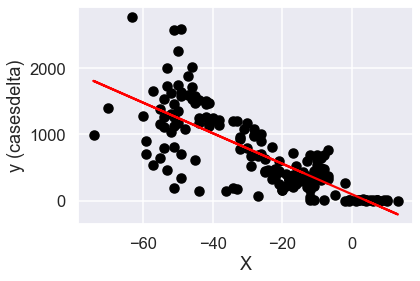

In [50]:
#model = LinearRegression()
## these are numpy arrays
X = dfca['retailrec'].to_numpy()
y = dfca['casesdelta'].to_numpy()

x_full = X.reshape(-1,1)
y_full = y
# Fit with full data
model.fit(x_full, y_full)
predicted_full = model.predict(x_full)
print('LINEARREGRESSION MODEL of CANADA retailrec vs casesdelta')
#  obtain the coefficient of determination (𝑅²) the square of the correlation between x and y scores.
r_sq = model.score(x_full, y_full)
print('coefficient of determination:', r_sq)
#get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
print('intercept:', model.intercept_)
plot(x_full, y_full, predicted_full)

LINEARREGRESSION MODEL of CANADA transit vs casesdelta
coefficient of determination: 0.5335002584381094
intercept: -214.83690947724983


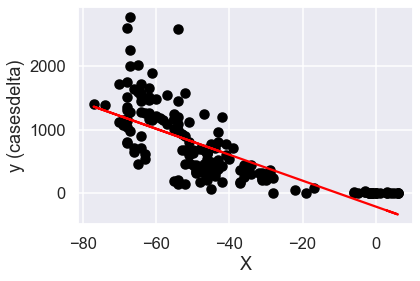

In [51]:
#model = LinearRegression()
## these are numpy arrays
X = dfca['transit'].to_numpy()
y = dfca['casesdelta'].to_numpy()

x_full = X.reshape(-1,1)
y_full = y
# Fit with full data
model.fit(x_full, y_full)
predicted_full = model.predict(x_full)
print('LINEARREGRESSION MODEL of CANADA transit vs casesdelta')
#  obtain the coefficient of determination (𝑅²) the square of the correlation between x and y scores.
r_sq = model.score(x_full, y_full)
print('coefficient of determination:', r_sq)
#get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
print('intercept:', model.intercept_)
plot(x_full, y_full, predicted_full)

LINEARREGRESSION MODEL of CANADA retailrec vs casesdelta
coefficient of determination: 0.4093293205077516
intercept: 74.1785449938069


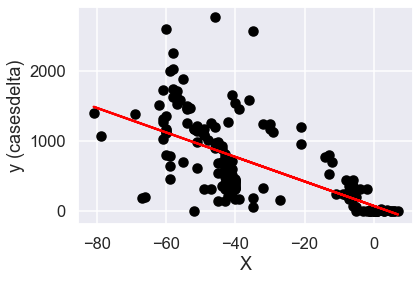

In [52]:
#model = LinearRegression()
## these are numpy arrays
X = dfca['work'].to_numpy()
y = dfca['casesdelta'].to_numpy()

x_full = X.reshape(-1,1)
y_full = y
# Fit with full data
model.fit(x_full, y_full)
predicted_full = model.predict(x_full)
print('LINEARREGRESSION MODEL of CANADA retailrec vs casesdelta')
#  obtain the coefficient of determination (𝑅²) the square of the correlation between x and y scores.
r_sq = model.score(x_full, y_full)
print('coefficient of determination:', r_sq)
#get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
print('intercept:', model.intercept_)
plot(x_full, y_full, predicted_full)

## Compare Regressions on Log of CasesDelta, 70/30 split of train/test data

### Model - Setup

In [54]:
# https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [60]:
dfnz2 = dfnz.drop(['country_region'], axis=1).drop(['date'], axis=1)
dfsi2 = dfsi.drop(['country_region'], axis=1).drop(['date'], axis=1)
dfca2 = dfca.drop(['country_region'], axis=1).drop(['date'], axis=1)
# model.fit errors
#could not convert string to float: '2020-04-27'
#could not convert string to float: 'New Zealand'

In [61]:
# log function below was returning error, RuntimeWarning: divide by zero encountered in log
# Observe that integer mobility values are type float64, should be int64
#dfsi2['casesdelta'] = dfsi2['casesdelta'].astype(pd.Int64Dtype())
dfsi2['retailrec'] = dfsi2['casesdelta'].astype(pd.Int64Dtype())
dfsi2['grocerrx'] = dfsi2['grocerrx'].astype(pd.Int64Dtype())
dfsi2['transit'] = dfsi2['transit'].astype(pd.Int64Dtype())
dfsi2['work'] = dfsi2['work'].astype(pd.Int64Dtype())
dfsi2['reside'] = dfsi2['reside'].astype(pd.Int64Dtype())

In [62]:
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#Single_model_regression.py
# root mean squared error, on log of price - per Kaggle
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation

# NEW ZEALAND
#y = np.log(dfnz2['casesdelta'])
#X = dfnz2.drop(labels=['casesdelta'], axis=1)

# SINGAPORE
y = np.log(dfsi2['casesdelta'])


# CANADA
#y = np.log(dfca2['casesdelta'])
#X = dfca2.drop(labels=['casesdelta'], axis=1)

In [63]:
# SINGAPORE
X = dfsi2.drop(labels=['casesdelta'], axis=1)

In [64]:
#X

In [65]:
#y

In [66]:
#Data transformation with held out data
#just as it is important to test a predictor on data held-out from training, 
#preprocessing (such as standardization, feature selection, etc.) and similar data transformations similarly should be learnt from a training set and applied to held-out data for prediction:
# 70/30 split of data into training and test sets
#The random_state parameter defaults to None, meaning that the shuffling will be different every time 
#To get identical results for each split, set random_state to an integer.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
X_train

,retailrec,grocerrx,transit,work,reside
18190,142,-3,-40,-37,31
18105,52,4,-25,-16,14
18173,544,-11,-51,-45,33
18087,12,-10,-16,-2,5
18230,334,-7,-35,-32,22
...,...,...,...,...,...
18168,373,-21,-61,-61,41
18132,1016,-25,-69,-68,44
18182,422,-14,-51,-47,34
18112,49,-5,-33,-27,19


In [68]:
y_train

18190    4.955827
18105    3.951244
18173    6.298949
18087    2.484907
18230    5.811141
           ...   
18168    5.921578
18132    6.923629
18182    6.045005
18112    3.891820
18237    6.811244
Name: casesdelta, Length: 127, dtype: float64

In [69]:
# ValueError: y cannot be None
# did not work, 
# y_train = y_train.fillna(method = 'ffill', inplace = True)
#y_train = np.nan_to_num(y_train)

###  Linear Regression #2

In [70]:
reg = LinearRegression()  # modest performance

In [72]:
# y_train contains -inf
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# https://datascience.stackexchange.com/questions/68291/python-and-gridsearchcv-how-to-eliminate-input-contains-nan-error-when-using-cro
# Several suggestions
#    transformed the dataframe into array of int32, still see error
#    impute missing values, still see error

# https://towardsdatascience.com/common-machine-learning-programming-errors-in-python-5d76de85e975

#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp.fit(x_train)
#x_train = imp.transform(x_train)
#x_test = imp.transform(x_test)
#

#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp.fit(X_train)
#X_train = imp.transform(X_train)
#X_test = imp.transform(X_test)


In [73]:
###ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
reg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predict =reg.predict(X_test)

In [ ]:
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross Validation RMSE: %.6f" % np.mean(np.sqrt(-scores)) )

reg.fit(X_train, y_train)
pred = reg.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, pred))
print("Model RMSE on 30%% Test Data: %.6f" % rmse)

gradient, intercept, r_value, p_value, std_err = stats.linregress(np.exp(pred), np.exp(y_test))
print('Gradient: %.4f' % gradient)
print('R Value: %.4f' % r_value)
print('R-Squared: %.4f' % r_value ** 2)

# adjusted R-squared - https://www.easycalculation.com/statistics/learn-adjustedr2.php
r_sq_adj = 1 - ((1 - r_value ** 2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1))
print('R-Squared Adjusted: %.4f' % r_sq_adj)

mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(pred))
print('MAPE: %.4f' % mape)

### Model - Lasso

In [ ]:
reg = Lasso(alpha=0.01, max_iter=5000)

In [ ]:
reg.fit(X_train, y_train)
predict =reg.predict(X_test)

In [ ]:
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross Validation RMSE: %.6f" % np.mean(np.sqrt(-scores)) )

reg.fit(X_train, y_train)
pred = reg.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, pred))
print("Model RMSE on 30%% Test Data: %.6f" % rmse)

gradient, intercept, r_value, p_value, std_err = stats.linregress(np.exp(pred), np.exp(y_test))
print('Gradient: %.4f' % gradient)
print('R Value: %.4f' % r_value)
print('R-Squared: %.4f' % r_value ** 2)

# adjusted R-squared - https://www.easycalculation.com/statistics/learn-adjustedr2.php
r_sq_adj = 1 - ((1 - r_value ** 2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1))
print('R-Squared Adjusted: %.4f' % r_sq_adj)

mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(pred))
print('MAPE: %.4f' % mape)

### Model i RandomForestRegressor

In [ ]:
reg = RandomForestRegressor(n_estimators=1000, n_jobs=3, random_state=42)

In [ ]:
reg.fit(X_train, y_train)
predict =reg.predict(X_test)

In [ ]:
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross Validation RMSE: %.6f" % np.mean(np.sqrt(-scores)) )

reg.fit(X_train, y_train)
pred = reg.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, pred))
print("Model RMSE on 30%% Test Data: %.6f" % rmse)

gradient, intercept, r_value, p_value, std_err = stats.linregress(np.exp(pred), np.exp(y_test))
print('Gradient: %.4f' % gradient)
print('R Value: %.4f' % r_value)
print('R-Squared: %.4f' % r_value ** 2)

# adjusted R-squared - https://www.easycalculation.com/statistics/learn-adjustedr2.php
r_sq_adj = 1 - ((1 - r_value ** 2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1))
print('R-Squared Adjusted: %.4f' % r_sq_adj)

mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(pred))
print('MAPE: %.4f' % mape)

### Model - SVR, needs data scaled

In [ ]:
#SVR needs data scaled
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
reg = SVR(gamma='auto')  # modest performance
# FutureWarning: The default value of gamma will change from 'auto' to 'scale' 
#                 in version 0.22 to account better for unscaled features. 
#SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
#    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
#    tol=0.001, verbose=False)

In [ ]:
X_train.info()

In [ ]:
y_train.info()

In [ ]:
reg.fit(X_train, y_train)
predict =reg.predict(X_test)

In [ ]:
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
print("Cross Validation RMSE: %.6f" % np.mean(np.sqrt(-scores)) )

reg.fit(X_train, y_train)
pred = reg.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, pred))
print("Model RMSE on 30%% Test Data: %.6f" % rmse)

gradient, intercept, r_value, p_value, std_err = stats.linregress(np.exp(pred), np.exp(y_test))
print('Gradient: %.4f' % gradient)
print('R Value: %.4f' % r_value)
print('R-Squared: %.4f' % r_value ** 2)

# adjusted R-squared - https://www.easycalculation.com/statistics/learn-adjustedr2.php
r_sq_adj = 1 - ((1 - r_value ** 2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1))
print('R-Squared Adjusted: %.4f' % r_sq_adj)

mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(pred))
print('MAPE: %.4f' % mape)

In [ ]:
#JUST ADDED this getting same error as original below
#https://www.datatechnotes.com/2019/01/svr-example-in-python.html
#x and y must be the same size
plt.scatter(X_train, y_train, s=5, color="blue", label="original")
plt.plot(x, pred, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

In [ ]:
plt.scatter(X_train, y_train, color = 'magenta')
#plt.plot(X_test, regressor.predict(X_test), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### plot actual vs model data

In [ ]:
#6 Visualising the Support Vector Regression results
#plt.scatter(X, y, color = 'magenta')
#plt.plot(X, regressor.predict(X), color = 'green')
#plt.title('Support Vector Regression Model')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.show()

## Multiple Linear Regression With scikit-learn 

## Polynomial Regression With scikit-learn 

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
## input must be a two-dimensional array, use .reshape() 
#x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
#y = np.array([15, 11, 2, 8, 25, 32])
## need to include 𝑥² (and perhaps other terms) as additional features when implementing polynomial regression. 
## For that reason, you should transform the input array x to contain the additional column(s) 
## with the values of 𝑥² (and eventually more features).
#transformer = PolynomialFeatures(degree=2, include_bias=False)

## Advanced Linear Regression (OLS) With statsmodels 

In [ ]:
import statsmodels.api as sm

### MAD borrow this for above

In [ ]:
#latest
#https://towardsdatascience.com/breaking-the-curse-of-small-datasets-in-machine-learning-part-1-36f28b0c044d
#import pandas as pd
#import numpy as np
#from sklearn.linear_model import LinearRegression

## Define slope and intercept
#a = 10
#b = 5

## Simulate x and y values for linear regression
#x = np.random.randn(30)*5
#y = a + b*x + np.random.randn(30)*20
#x_less = x[:10].reshape(-1,1)
#y_less = y[:10]
#x_full = x.reshape(-1,1)
#y_full = y

## Regression plot
#def plot(x, y , predicted):
#    plt.scatter(x, y, color='black')
#    plt.plot(x, predicted,'-r')
#    plt.xlabel('X')
#    plt.ylabel('Y')
#    plt.show()

## Fit regression model
#model = LinearRegression()

## Fit with less data and plot
#model.fit(x_less, y_less)
#predicted_less = model.predict(x_less)
#plot(x_less, y_less, predicted_less)

## Fit with full data
#model.fit(x_full, y_full)
#predicted_full = model.predict(x_full)
#plot(x_full, y_full, predicted_full)

##  obtain the coefficient of determination (𝑅²)
#r_sq = model.score(x_full, y_full)
#print('coefficient of determination:', r_sq)
##get attributes of model .intercept_, which represents the coefficient, 𝑏₀ 
#print('intercept:', model.intercept_)


In [ ]:
#It can be clearly seen above that the data is right skewed. 
#Regression model performs better for normally distributed data. 
#As it can be seen that lower values and higher values makes our data deviating.
#So lets make variable transform which can diminish this difference. 
#Log Transform seems viable for our purpose here

train1 = dfsi
#We use the numpy function log1p which  applies log(1+x) to all elements of the column
train1.loc[:, "casesdelta"] = np.log1p(train1.loc[:, "casesdelta"])
# drops 2 rows from 182 to 180
train2 = train1
#.dropna()
train2

#Check the new distribution 
#ValueError: cannot convert float NaN to integer
sns.distplot(train2['casesdelta'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train2['casesdelta'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('casesdelta distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train2['casesdelta'], plot=plt)
plt.show()

## Transformed train1 data is more close to normal distribution now
## but how have we altered our predictions